In [18]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import clear_output

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv1DTranspose
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

In [19]:
with open('train.dat', 'rb') as f:
    train_X = np.load(f)
    train_Y = np.load(f)

In [20]:
print(train_X.shape, train_Y.shape)

(2624, 4320, 53) (2624, 1)


In [21]:
with open('valid.dat', 'rb') as f:
    valid_X = np.load(f)
    valid_Y = np.load(f)

In [22]:
print(valid_X.shape, valid_Y.shape)

(296, 4320, 53) (296, 1)


In [23]:
class BestEpoch(Callback):
  def __init__(self, metric='val_loss', mode='min'):
    super().__init__()
    self.metric = metric
    self.mode = mode
    

  def on_train_begin(self, logs={}):
    self.bestEpoch = 0
    if self.mode == 'min':
      self.bestLoss = 1e8
    else:
      self.bestLoss = -1e8

  def on_epoch_end(self, epoch, logs={}):
    valLoss = logs.get(self.metric)
    if self.mode == 'min' and valLoss < self.bestLoss:
      self.bestLoss = valLoss
      self.bestEpoch = epoch+1
    elif valLoss > self.bestLoss:
      self.bestLoss = valLoss
      self.bestEpoch = epoch+1

  def get_best_epoch(self):
    return self.bestEpoch



In [24]:
class PlotLoss(Callback):
  def __init__(self, metric='val_loss'):
    super().__init__()
    self.metric = metric
    matplotlib.interactive(True)
    
  def __del__(self):
    plt.close('all')

  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.loss_y = []
    self.metric_y = []
    self.logs = []
    self.fig = plt.figure()

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)
    self.loss_y.append(logs.get('loss'))
    self.metric_y.append(logs.get(self.metric))
    self.i += 1

    #clear_output(wait=True)
    plt.clf()
    plt.plot(self.x, self.loss_y, label="loss")
    plt.plot(self.x, self.metric_y, label=self.metric)
    plt.legend()
    plt.show(block=False);
    plt.draw();
    plt.pause(0.05)
    print(logs)


In [30]:
epochs=20
batch_size=16
learning_rate=1e-3

In [31]:
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

In [33]:
filepath="dscovrmatic-mlp-e{epoch:d}"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')
plotloss = PlotLoss()
bestepoch = BestEpoch()
earlystop = EarlyStopping(monitor='val_loss', mode='min', patience=3, min_delta=1e-5)
callbacks = [checkpoint, plotloss, bestepoch, earlystop]


Epoch 1/20


2023-10-09 01:28:19.905477: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:648] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-09 01:28:19.937742: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x9166cb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-09 01:28:19.937779: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-09 01:28:19.941685: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-09 01:28:20.042938: I tensorflow/compiler/jit/xla_compilation_cache.cc:480] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


162/164 [============================>.] - ETA: 0s - loss: 0.2306 - mse: 0.2306
Epoch 1: val_loss improved from inf to 0.21141, saving model to dscovrmatic-mlp-e1
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_

INFO:tensorflow:Assets written to: dscovrmatic-mlp-e1/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e1/assets


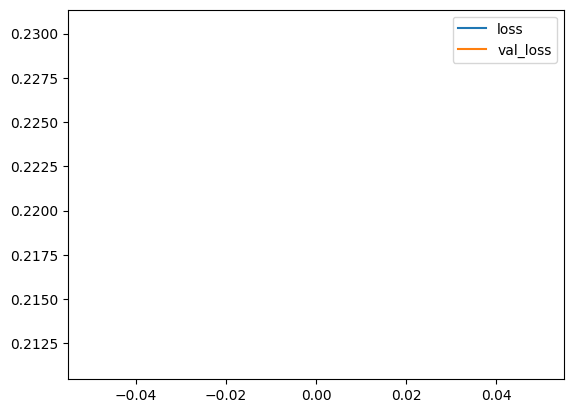

<Figure size 640x480 with 0 Axes>

{'loss': 0.2303970903158188, 'mse': 0.2303970903158188, 'val_loss': 0.21141432225704193, 'val_mse': 0.21141432225704193}
164/164 [==============================] - 3s 12ms/step - loss: 0.2304 - mse: 0.2304 - val_loss: 0.2114 - val_mse: 0.2114
Epoch 2/20
155/164 [===========================>..] - ETA: 0s - loss: 0.1953 - mse: 0.1953
Epoch 2: val_loss improved from 0.21141 to 0.17807, saving model to dscovrmatic-mlp-e2
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e2/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e2/assets


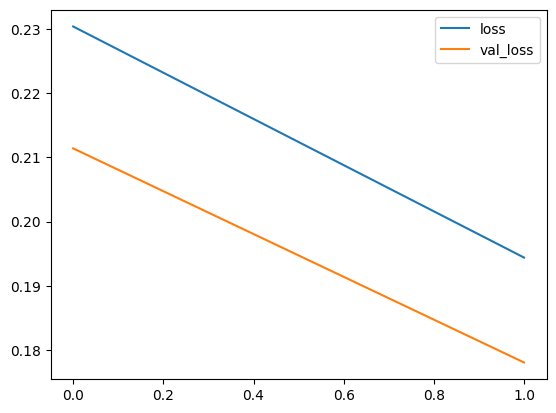

<Figure size 640x480 with 0 Axes>

{'loss': 0.19440647959709167, 'mse': 0.19440647959709167, 'val_loss': 0.1780673712491989, 'val_mse': 0.1780673712491989}
164/164 [==============================] - 2s 9ms/step - loss: 0.1944 - mse: 0.1944 - val_loss: 0.1781 - val_mse: 0.1781
Epoch 3/20
162/164 [============================>.] - ETA: 0s - loss: 0.1638 - mse: 0.1638
Epoch 3: val_loss improved from 0.17807 to 0.14979, saving model to dscovrmatic-mlp-e3
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e3/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e3/assets


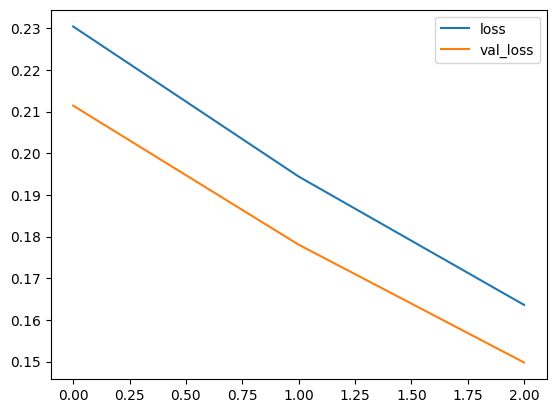

<Figure size 640x480 with 0 Axes>

{'loss': 0.1636105328798294, 'mse': 0.1636105328798294, 'val_loss': 0.1497945785522461, 'val_mse': 0.1497945785522461}
164/164 [==============================] - 1s 9ms/step - loss: 0.1636 - mse: 0.1636 - val_loss: 0.1498 - val_mse: 0.1498
Epoch 4/20
158/164 [===========================>..] - ETA: 0s - loss: 0.1381 - mse: 0.1381
Epoch 4: val_loss improved from 0.14979 to 0.12613, saving model to dscovrmatic-mlp-e4
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e4/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e4/assets


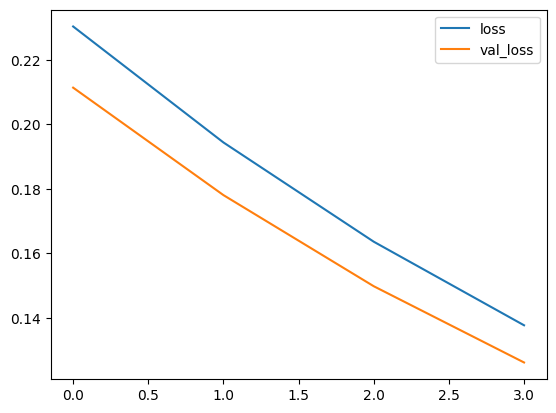

<Figure size 640x480 with 0 Axes>

{'loss': 0.13767558336257935, 'mse': 0.13767558336257935, 'val_loss': 0.12613359093666077, 'val_mse': 0.12613359093666077}
164/164 [==============================] - 1s 9ms/step - loss: 0.1377 - mse: 0.1377 - val_loss: 0.1261 - val_mse: 0.1261
Epoch 5/20
158/164 [===========================>..] - ETA: 0s - loss: 0.1164 - mse: 0.1164
Epoch 5: val_loss improved from 0.12613 to 0.10649, saving model to dscovrmatic-mlp-e5
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e5/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e5/assets


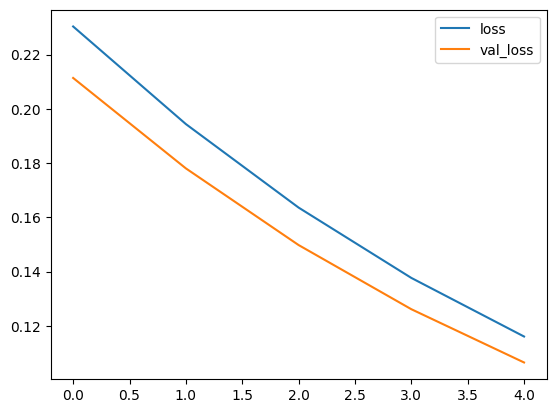

<Figure size 640x480 with 0 Axes>

{'loss': 0.11606305837631226, 'mse': 0.11606305837631226, 'val_loss': 0.10649025440216064, 'val_mse': 0.10649025440216064}
164/164 [==============================] - 1s 9ms/step - loss: 0.1161 - mse: 0.1161 - val_loss: 0.1065 - val_mse: 0.1065
Epoch 6/20
156/164 [===========================>..] - ETA: 0s - loss: 0.0985 - mse: 0.0985
Epoch 6: val_loss improved from 0.10649 to 0.09025, saving model to dscovrmatic-mlp-e6
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e6/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e6/assets


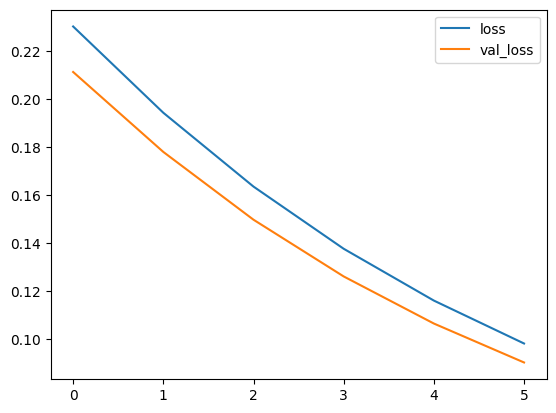

<Figure size 640x480 with 0 Axes>

{'loss': 0.09815945476293564, 'mse': 0.09815945476293564, 'val_loss': 0.09024617075920105, 'val_mse': 0.09024617075920105}
164/164 [==============================] - 1s 9ms/step - loss: 0.0982 - mse: 0.0982 - val_loss: 0.0902 - val_mse: 0.0902
Epoch 7/20
162/164 [============================>.] - ETA: 0s - loss: 0.0834 - mse: 0.0834
Epoch 7: val_loss improved from 0.09025 to 0.07682, saving model to dscovrmatic-mlp-e7
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e7/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e7/assets


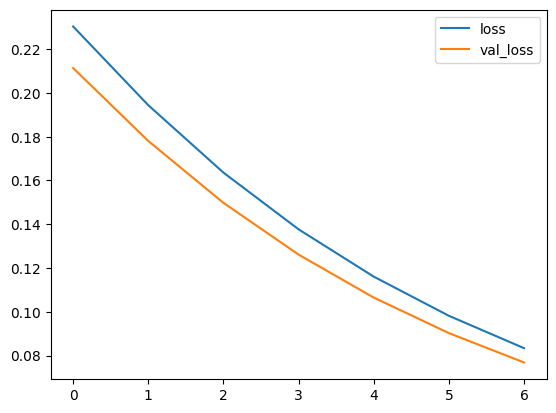

<Figure size 640x480 with 0 Axes>

{'loss': 0.08336297422647476, 'mse': 0.08336297422647476, 'val_loss': 0.07682351022958755, 'val_mse': 0.07682351022958755}
164/164 [==============================] - 1s 9ms/step - loss: 0.0834 - mse: 0.0834 - val_loss: 0.0768 - val_mse: 0.0768
Epoch 8/20
161/164 [============================>.] - ETA: 0s - loss: 0.0712 - mse: 0.0712
Epoch 8: val_loss improved from 0.07682 to 0.06572, saving model to dscovrmatic-mlp-e8
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e8/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e8/assets


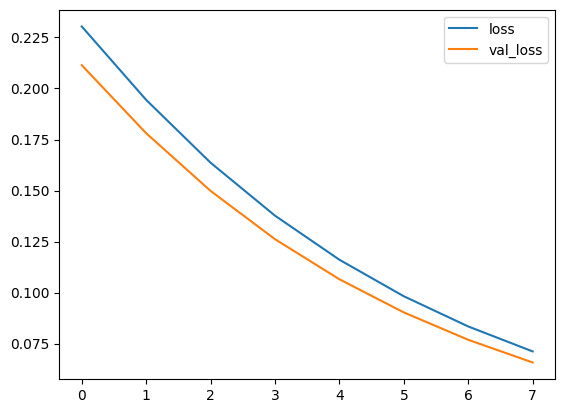

<Figure size 640x480 with 0 Axes>

{'loss': 0.07112951576709747, 'mse': 0.07112951576709747, 'val_loss': 0.06571543961763382, 'val_mse': 0.06571543961763382}
164/164 [==============================] - 2s 10ms/step - loss: 0.0711 - mse: 0.0711 - val_loss: 0.0657 - val_mse: 0.0657
Epoch 9/20
155/164 [===========================>..] - ETA: 0s - loss: 0.0612 - mse: 0.0612
Epoch 9: val_loss improved from 0.06572 to 0.05649, saving model to dscovrmatic-mlp-e9
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e9/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e9/assets


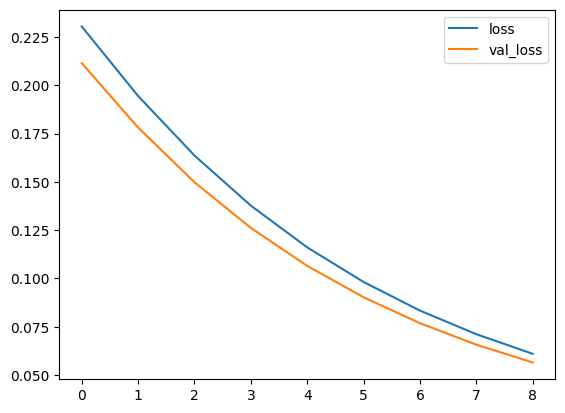

<Figure size 640x480 with 0 Axes>

{'loss': 0.060991402715444565, 'mse': 0.060991402715444565, 'val_loss': 0.056493934243917465, 'val_mse': 0.056493934243917465}
164/164 [==============================] - 1s 9ms/step - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0565 - val_mse: 0.0565
Epoch 10/20
162/164 [============================>.] - ETA: 0s - loss: 0.0526 - mse: 0.0526
Epoch 10: val_loss improved from 0.05649 to 0.04881, saving model to dscovrmatic-mlp-e10
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e10/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e10/assets


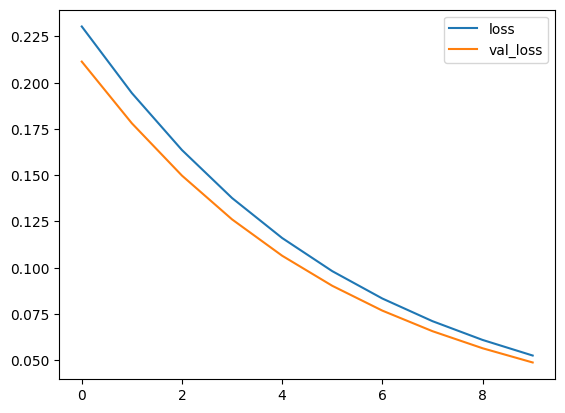

<Figure size 640x480 with 0 Axes>

{'loss': 0.05255863070487976, 'mse': 0.05255863070487976, 'val_loss': 0.04880642518401146, 'val_mse': 0.04880642518401146}
164/164 [==============================] - 1s 9ms/step - loss: 0.0526 - mse: 0.0526 - val_loss: 0.0488 - val_mse: 0.0488
Epoch 11/20
160/164 [============================>.] - ETA: 0s - loss: 0.0456 - mse: 0.0456
Epoch 11: val_loss improved from 0.04881 to 0.04237, saving model to dscovrmatic-mlp-e11
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e11/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e11/assets


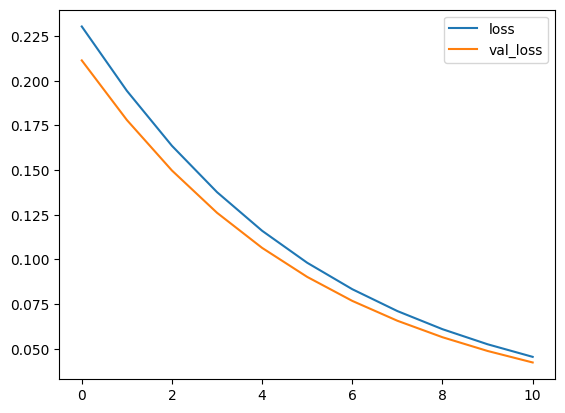

<Figure size 640x480 with 0 Axes>

{'loss': 0.04551257938146591, 'mse': 0.04551257938146591, 'val_loss': 0.04236672818660736, 'val_mse': 0.04236672818660736}
164/164 [==============================] - 1s 9ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 12/20
159/164 [============================>.] - ETA: 0s - loss: 0.0397 - mse: 0.0397
Epoch 12: val_loss improved from 0.04237 to 0.03694, saving model to dscovrmatic-mlp-e12
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e12/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e12/assets


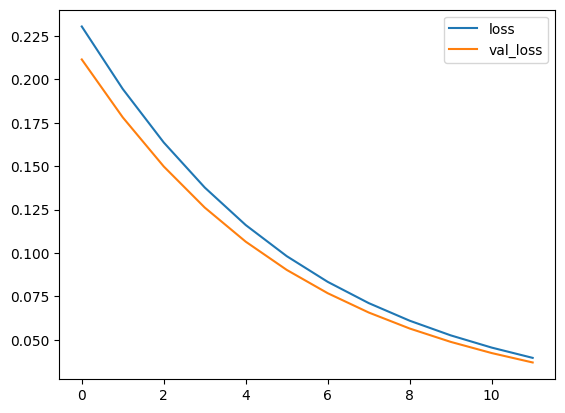

<Figure size 640x480 with 0 Axes>

{'loss': 0.03959564492106438, 'mse': 0.03959564492106438, 'val_loss': 0.03694439306855202, 'val_mse': 0.03694439306855202}
164/164 [==============================] - 1s 9ms/step - loss: 0.0396 - mse: 0.0396 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 13/20
159/164 [============================>.] - ETA: 0s - loss: 0.0347 - mse: 0.0347
Epoch 13: val_loss improved from 0.03694 to 0.03235, saving model to dscovrmatic-mlp-e13
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e13/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e13/assets


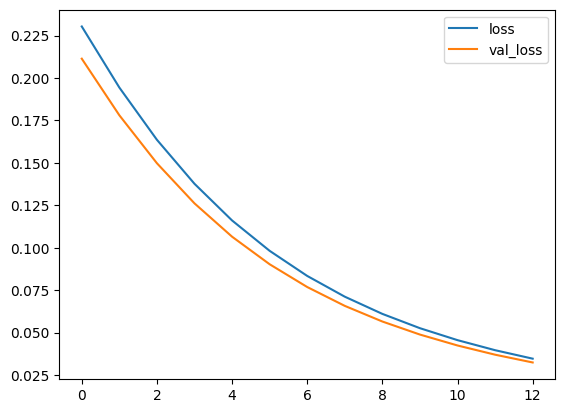

<Figure size 640x480 with 0 Axes>

{'loss': 0.034600745886564255, 'mse': 0.034600745886564255, 'val_loss': 0.0323544479906559, 'val_mse': 0.0323544479906559}
164/164 [==============================] - 1s 9ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 14/20
161/164 [============================>.] - ETA: 0s - loss: 0.0304 - mse: 0.0304
Epoch 14: val_loss improved from 0.03235 to 0.02845, saving model to dscovrmatic-mlp-e14
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e14/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e14/assets


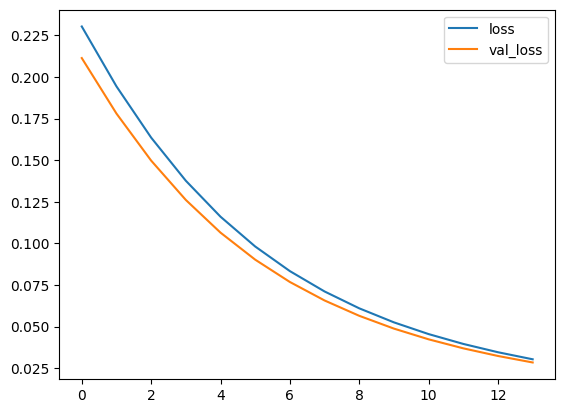

<Figure size 640x480 with 0 Axes>

{'loss': 0.030361762270331383, 'mse': 0.030361762270331383, 'val_loss': 0.028448527678847313, 'val_mse': 0.028448527678847313}
164/164 [==============================] - 1s 9ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 15/20
159/164 [============================>.] - ETA: 0s - loss: 0.0268 - mse: 0.0268
Epoch 15: val_loss improved from 0.02845 to 0.02511, saving model to dscovrmatic-mlp-e15
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e15/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e15/assets


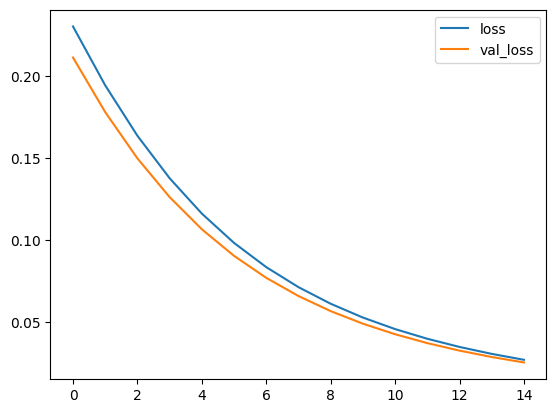

<Figure size 640x480 with 0 Axes>

{'loss': 0.026745427399873734, 'mse': 0.026745427399873734, 'val_loss': 0.02510753460228443, 'val_mse': 0.02510753460228443}
164/164 [==============================] - 2s 10ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 16/20
156/164 [===========================>..] - ETA: 0s - loss: 0.0237 - mse: 0.0237
Epoch 16: val_loss improved from 0.02511 to 0.02224, saving model to dscovrmatic-mlp-e16
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e16/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e16/assets


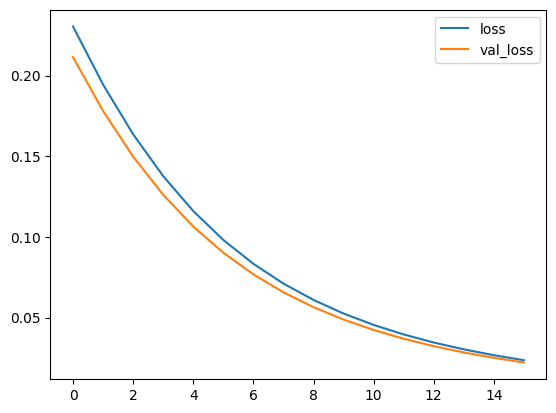

<Figure size 640x480 with 0 Axes>

{'loss': 0.023644739761948586, 'mse': 0.023644739761948586, 'val_loss': 0.022235630080103874, 'val_mse': 0.022235630080103874}
164/164 [==============================] - 1s 9ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 17/20
158/164 [===========================>..] - ETA: 0s - loss: 0.0210 - mse: 0.0210
Epoch 17: val_loss improved from 0.02224 to 0.01976, saving model to dscovrmatic-mlp-e17
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e17/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e17/assets


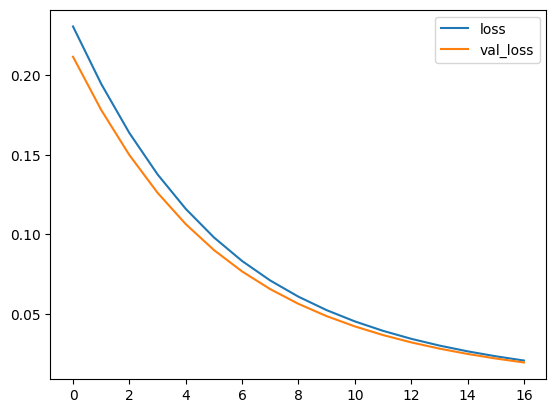

<Figure size 640x480 with 0 Axes>

{'loss': 0.02097315713763237, 'mse': 0.02097315713763237, 'val_loss': 0.019755154848098755, 'val_mse': 0.019755154848098755}
164/164 [==============================] - 1s 9ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 18/20
161/164 [============================>.] - ETA: 0s - loss: 0.0187 - mse: 0.0187
Epoch 18: val_loss improved from 0.01976 to 0.01760, saving model to dscovrmatic-mlp-e18
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e18/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e18/assets


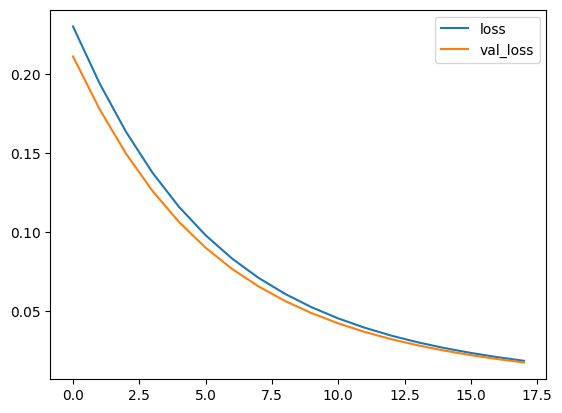

<Figure size 640x480 with 0 Axes>

{'loss': 0.018660632893443108, 'mse': 0.018660632893443108, 'val_loss': 0.01760311797261238, 'val_mse': 0.01760311797261238}
164/164 [==============================] - 1s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 19/20
161/164 [============================>.] - ETA: 0s - loss: 0.0167 - mse: 0.0167
Epoch 19: val_loss improved from 0.01760 to 0.01573, saving model to dscovrmatic-mlp-e19
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e19/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e19/assets


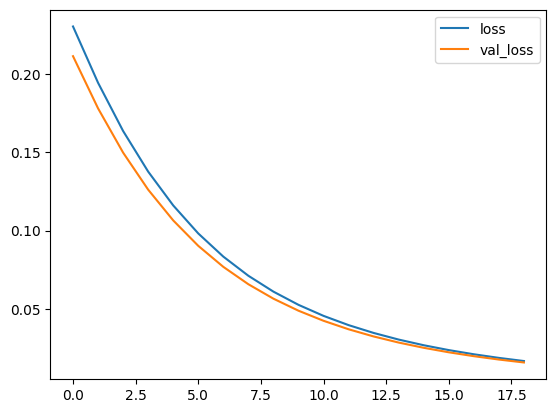

<Figure size 640x480 with 0 Axes>

{'loss': 0.016650130972266197, 'mse': 0.016650130972266197, 'val_loss': 0.015728116035461426, 'val_mse': 0.015728116035461426}
164/164 [==============================] - 1s 9ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 20/20
158/164 [===========================>..] - ETA: 0s - loss: 0.0149 - mse: 0.0149
Epoch 20: val_loss improved from 0.01573 to 0.01409, saving model to dscovrmatic-mlp-e20
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(53, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35d2040>, 140388311103568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35a2f70>, 140386113425616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35914f0>, 140388311213360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35b6070>, 140388311213840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb35c4df0>, 140388311248528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7faeb355aeb0>, 140388311253200), {}).


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e20/assets


INFO:tensorflow:Assets written to: dscovrmatic-mlp-e20/assets


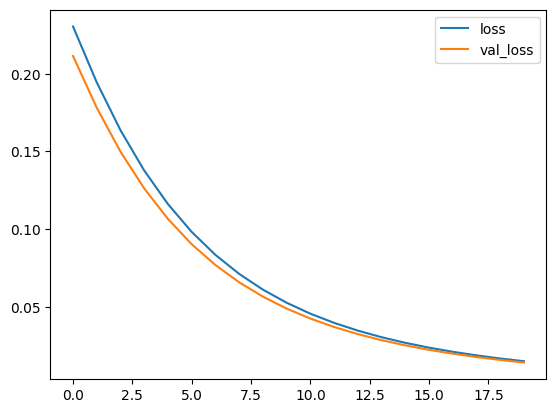

<Figure size 640x480 with 0 Axes>

{'loss': 0.014895026572048664, 'mse': 0.014895026572048664, 'val_loss': 0.014087988063693047, 'val_mse': 0.014087988063693047}
164/164 [==============================] - 1s 9ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0141 - val_mse: 0.0141


In [34]:
model.fit(train_X, train_Y, validation_data=(valid_X, valid_Y), epochs=epochs, batch_size=batch_size, callbacks=callbacks, verbose=1, shuffle=1)
bestEpoch = bestepoch.get_best_epoch()

In [35]:
y_hat = model.predict(valid_X, batch_size=4)

74/74 [==============================] - 0s 1ms/step


In [36]:
print(y_hat)

[[[0.11869282]
  [0.11869282]
  [0.11869282]
  ...
  [0.11869282]
  [0.11869282]
  [0.11869282]]

 [[0.11869282]
  [0.11869282]
  [0.11869282]
  ...
  [0.11869282]
  [0.11869282]
  [0.11869282]]

 [[0.11869282]
  [0.11869282]
  [0.11869282]
  ...
  [0.11869282]
  [0.11869282]
  [0.11869282]]

 ...

 [[0.11869282]
  [0.11869282]
  [0.11869282]
  ...
  [0.11869282]
  [0.11869282]
  [0.11869282]]

 [[0.11869282]
  [0.11869282]
  [0.11869282]
  ...
  [0.11869282]
  [0.11869282]
  [0.11869282]]

 [[0.11869282]
  [0.11869282]
  [0.11869282]
  ...
  [0.11869282]
  [0.11869282]
  [0.11869282]]]
